## Burgers Equation

$$ \frac{\partial u}{\partial t} = - u \frac{\partial u}{\partial x} + \nu \frac{\partial^2 u}{\partial x^2} $$

In [447]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft 

np.random.seed(0)

## Initial function which we will use

In [448]:
def initial_condition(x):
    return -np.sin(np.pi*x) + np.sin(3*np.pi*x) + 3*np.sin(5*np.pi*x) + 0.5*np.sin(7*np.pi*x)

#### Taking the initial conditions

In [449]:
Range_start = -1 #initial condition of where to start
Range_stop = 1 #Final point where we will stop
Range_length = Range_stop - Range_start # Will give the length of the condition
dx = 0.01 # Will define the minimum x difference
num_points = int(round(Range_length/dx) + 1) # Will give the mumber of points
x_range = np.linspace(Range_start,Range_stop,int(num_points)) # Will output the x values

nu = 0.1/np.pi # Defining the value of nu

In [450]:
num_points

201

In [451]:
test_value = fft.fft(x_range)

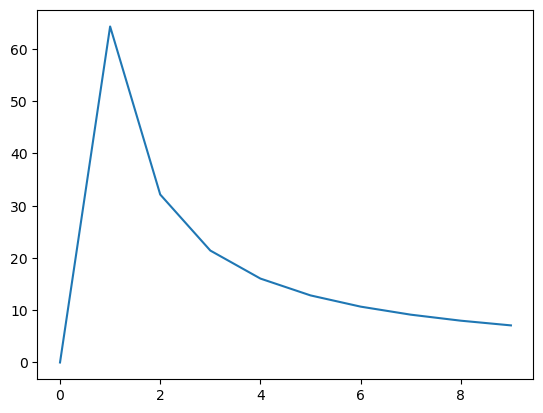

In [ ]:
# plt.plot(test_value[0:10].imag)

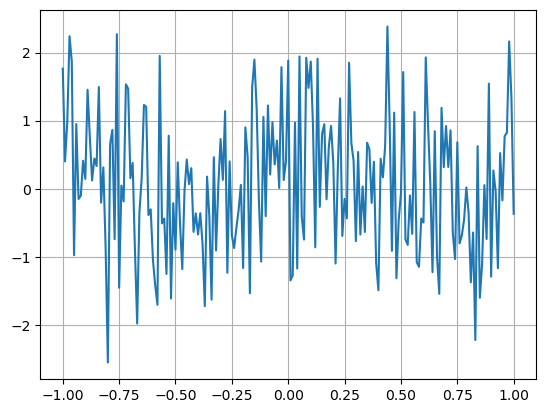

In [453]:
mean = 0
variance = 1
num_grfs = 1
length = num_points
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, np.sqrt(variance), length)
window_size = 10
u_0 = s # np.convolve(s, np.ones(window_size)/window_size, mode='same') # initial_condition(x_range) # will give initial condition in the real space

# u_0 =   # initial_condition(x_range) # will give initial condition in the real space
plt.plot(x_range,u_0) # Plot for visualization

plt.grid()

##### Creating fft parameters

In [454]:
dt = 1e-2 # time step value
t_max = 1 # Maximum time range
num_t_points = int(round(t_max)/dt + 1) # Number of points
t_range = np.linspace(0,t_max,int(num_t_points))

In [455]:
kappa = 2*np.pi*fft.fftfreq(num_points,d=dx)
#u = fft.fft(u_0)
#plt.plot(kappa,u.real)
#plt.xlim([-10,10])

In [456]:
def du_dt(u,time_range,kappa,nu):
    u_hat = fft.fft(u)
    fourier_du_dx = 1j*kappa*u_hat
    fourier_du2_dx2 = -(kappa**2)*u_hat

    real_du_dt = fft.ifft(fourier_du_dx)
    real_du2_dx2 = fft.ifft(fourier_du2_dx2)

    return (-u*real_du_dt + nu*real_du2_dx2).real

In [457]:
u_record = odeint(du_dt,u_0,t_range,args=(kappa,nu))
u_record[1,1]

1.017675008110166

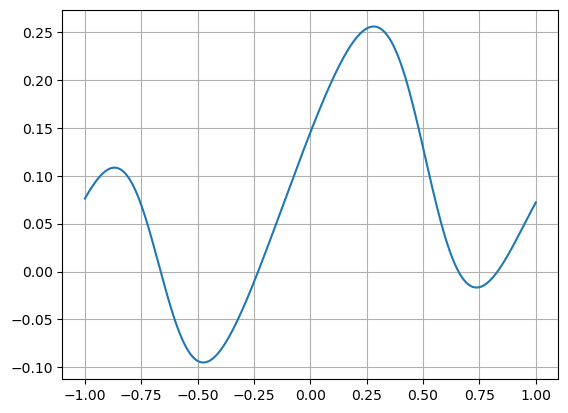

In [458]:
time_asked = int(round(1/dt -1))
plt.plot(x_range,u_record[-1,:])
plt.grid()

In [465]:
u_record.shape

(101, 201)

In [459]:
#U_value_stack = u_record.reshape(-1,1)
#x_range_stack = x_range.reshape(1,-1)
#x_range_stack = np.tile(x_range_stack,(num_t_points,1)).flatten().reshape(-1,1)
#time_range_stack = np.tile(t_range.reshape(-1,1),(1,num_points)).reshape(-1,1)
#u0_value_stack = np.tile(u_0.reshape(1,-1),(len(x_range_stack),1))

In [460]:
#Final_np_array = np.concatenate((u0_value_stack,x_range_stack,time_range_stack,U_value_stack),axis=1)
#Final_np_array.shape

In [461]:
#import pandas as pd

#Final_df = pd.DataFrame(Final_np_array)
#Final_df.head()

In [462]:
# Final_df.to_pickle("test_df.pkl")

In [463]:
# Final_df.to_csv("minus_sin_pix.csv")